## Plot KS-test results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import stats
from functools import partial

In [2]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#9370da']
colors_light = ['#fecfcf','#8ec7fe','#c8b7ec']

In [3]:
# Set parameters
a,b,c = 0.1,1.5,2.0

In [4]:
# Load all data
τ2_rejection_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection.dat"%(a,b,c))
τ2_direct_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_simpleTruncexpon_direct.dat"%(a,b,c))

In [5]:
# Get total number of samples in data
num_samples_data = τ2_rejection_full_data.shape[0]
print("There are a total of %d samples in the full data set."%num_samples_data)

There are a total of 1000000 samples in the full data set.


In [6]:
# Set start index (i.e, how many samples will be thrownaway due to equilibration)
equil_percent = 0.2
start = int(num_samples_data*equil_percent)

print("The %d first samples will be thrown away for equilibration."%start)

The 200000 first samples will be thrown away for equilibration.


In [7]:
# Set number of desired samples to use
num_samples = num_samples_data-start

print("There are a total of %d samples left in the data set after equilibration."%(num_samples))

There are a total of 800000 samples left in the data set after equilibration.


In [8]:
τ2_rejection = τ2_rejection_full_data[start:]
τ2_direct = τ2_direct_full_data[start:]

In [9]:
def P(τ,a,b,c):
    Z = (1-np.exp(-c*(b-a)))/c
    return (1/Z)*np.exp(-c*(τ-a));

def cdf(τ,a,b,c):
    Z = (1-np.exp(-c*(b-a)))/c
    return (1-np.exp(-c*(τ-a)))/(c*Z)

def P_times_tau(τ,a,b,c):
    Z = (1-np.exp(-c*(b-a)))/c
    return τ*(1/Z)*np.exp(-c*(τ-a));

In [10]:
cdf_fixed = partial(cdf,a=a,b=b,c=c)

In [17]:
ksvalues_rejection = np.loadtxt("../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection_ksTest.dat"%(a,b,c))[:,0]
ksvalues_direct = np.loadtxt("../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_direct_ksTest.dat"%(a,b,c))[:,0] 

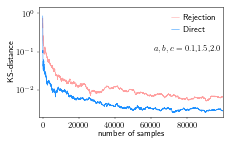

In [20]:
with plt.style.context('../IOP_large.mplstyle'):

    fig,ax = plt.subplots(constrained_layout=True)

    ax.set_yscale("log")

    ax.plot(range(ksvalues_rejection.shape[0]),ksvalues_rejection,label='Rejection', color=colors[0])
    ax.plot(range(ksvalues_direct.shape[0]),ksvalues_direct,label='Direct', color=colors[1])
    ax.axhline(0.0,color="#aaaaaa",zorder=-10)
    ax.set_ylabel("KS-distance")
    ax.set_xlim(-2000,100000-1)
    ax.set_ylim(0.002,1.5)
    ax.set_xlabel("number of samples")

    ax.annotate(r"$a,b,c = %.1f$,$%.1f$,$%.1f$"%(a,b,c),(0.99,0.60),
                    xycoords='axes fraction', ha='right')

    ax.legend(loc='upper right',handlelength=1, handletextpad=0.5)

    plt.savefig("../figures/%.6f_%.6f_%.6f_simpleTruncexpon_ksTest.pdf"%(a,b,c))
    plt.savefig("../figures/%.6f_%.6f_%.6f_simpleTruncexpon_ksTest.svg"%(a,b,c))

### Perform KS-test

NOTE: This will take a long time. The results have been saved to file in the processed_data directory for quick plotting.

In [11]:
# Compute kstest as a function of sample number
num_samples_rejection = 100000
num_samples_direct = 100000

In [12]:
pvalues_rejection = np.zeros(num_samples_rejection)
pvalues_direct = np.zeros(num_samples_direct)

In [13]:
ksvalues_rejection = np.zeros(num_samples_rejection)
ksvalues_direct = np.zeros(num_samples_direct)

In [14]:
%%time
for i in range(num_samples_rejection):
    if i%10000==0: print("%d/%d"%(i,num_samples_rejection))
    
    ksvalues_rejection[i],pvalues_rejection[i] = stats.kstest(τ2_rejection[:i+1],cdf_fixed)

    ksvalues_direct[i],pvalues_direct[i] = stats.kstest(τ2_direct[:i+1],cdf_fixed)
    

0/100000
10000/100000
20000/100000
30000/100000
40000/100000
50000/100000
60000/100000
70000/100000
80000/100000
90000/100000
CPU times: user 1h 55min 4s, sys: 46.7 s, total: 1h 55min 51s
Wall time: 1h 57min 52s


In [15]:
stats.kstest(τ2_rejection[:100],cdf_fixed)

KstestResult(statistic=0.39260114216210185, pvalue=2.1164736531609455e-14)

In [16]:
# Write sample number, KS-statistic and p values to file
filename_rejection = "../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection_ksTest.dat"%(a,b,c)
file_rejection = open(filename_rejection,"w")
header = "# ks-value      p-value \n"
file_rejection.write(header)
for i,ks in enumerate(ksvalues_rejection):
    file_rejection.write("%.12f %.12f \n"%(ksvalues_rejection[i],pvalues_rejection[i]))

filename_direct = "../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_direct_ksTest.dat"%(a,b,c)
file_direct = open(filename_direct,"w")
header = "# ks-value      p-value \n"
file_direct.write(header)
for i,ks in enumerate(ksvalues_direct):
    file_direct.write("%.12f %.12f \n"%(ksvalues_direct[i],pvalues_direct[i]))
    
file_rejection.close()
file_direct.close()